### Fill out:
Name & Surname:Daniel Ong

Student ID:34897887

## W7&W8 post studio exercises (multivariate linear regression, regularisation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

We will use diabetes data. Download this data from [the Gitlab site](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/Regression/Diabetes_Data.csv) into the same directory as the notebook on your computer. 

Run the following code from the pre-studio notebook.

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # models we are going to use
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for comparing the predicted and test values
import seaborn as sns

In [12]:
df = pd.read_csv('Diabetes_Data.csv', usecols = range(0,11)) # read the Diabetes dataset in to a pandas dataframe
corrs = df.corr()          # calculate the correlation table
X = df.drop(['Y'],axis=1)  # Create a Dataframe without the target variable Y.
Y = df['Y']                # Extract a Series of the target Y values.

In [13]:
# The below code is identical to our first attempt, the only change is
# substituting nX for X in train_test_split, to use our normalised data.
nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train);  # Fit the model parameters to the training data.

In [14]:
from sklearn.model_selection import cross_validate, RepeatedKFold # import sklearn methods

# cross_validate takes the particular model, in this case linear regression which we instantatiated earlier,
# and undertakes a number of runs according the method specified by cv=
# RepeatedKFold splits the data into n sections and repeat the regression modelling 5 times, giving 25 runs
# return_estimator=True returns the fitting data for each run
scores = cross_validate(
    linear, nX, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)
# take the results for each simulation (estimator), extract the coefficients for each run 
# and add them to a dataframe with columns being the feature names
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']],columns=nX.columns)

### Exercise 1 (correlation coefs vs linear regression coefs)

Compare the (mean of) model coefficients computed in the linear regression with the correlation scores found in the initial data analysis in pre-studio notebook. Choose any plot or table which you think is suitable for this comparison. Comment on whether the model fitting results are consistent with the correlation scores.

In [15]:
# Hint 1: Table of correlation coefficients and dataframe with reg. coefs from cross validation are given above.
# Hint 2: Create a dataframe which has the correlations with Y as a column, and then the 
# mean of coefficients computed from the cross_validate method for the other column.
# You will need to scale the coefficients in order to compare this with the correlations (divide by 30, for example). 
# Hint 3: A bar plot seems like a good idea!



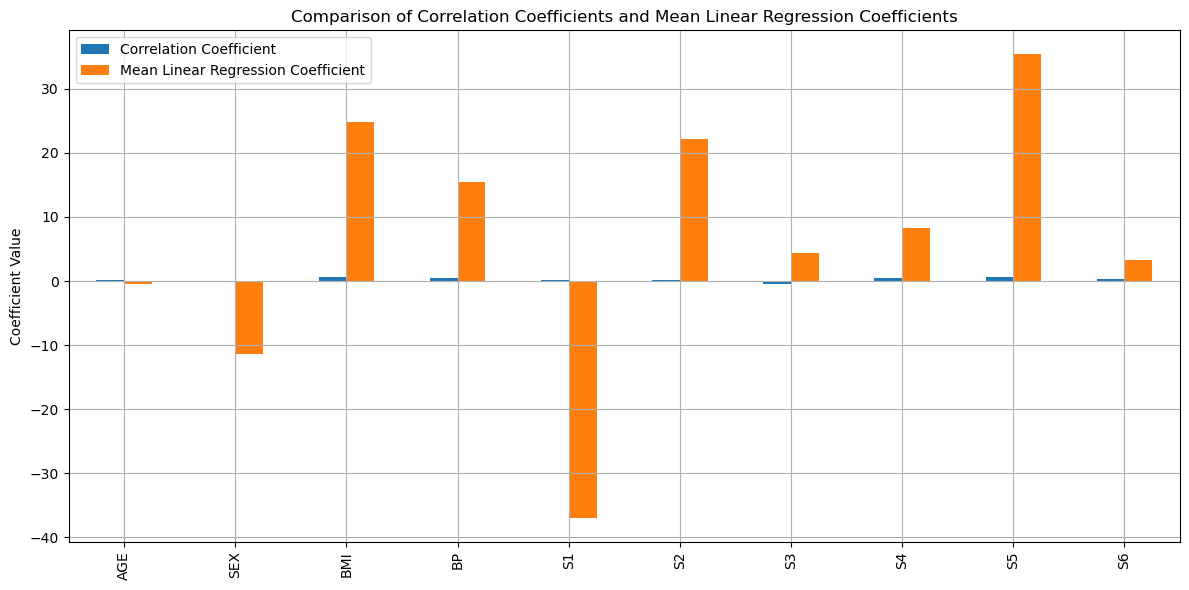

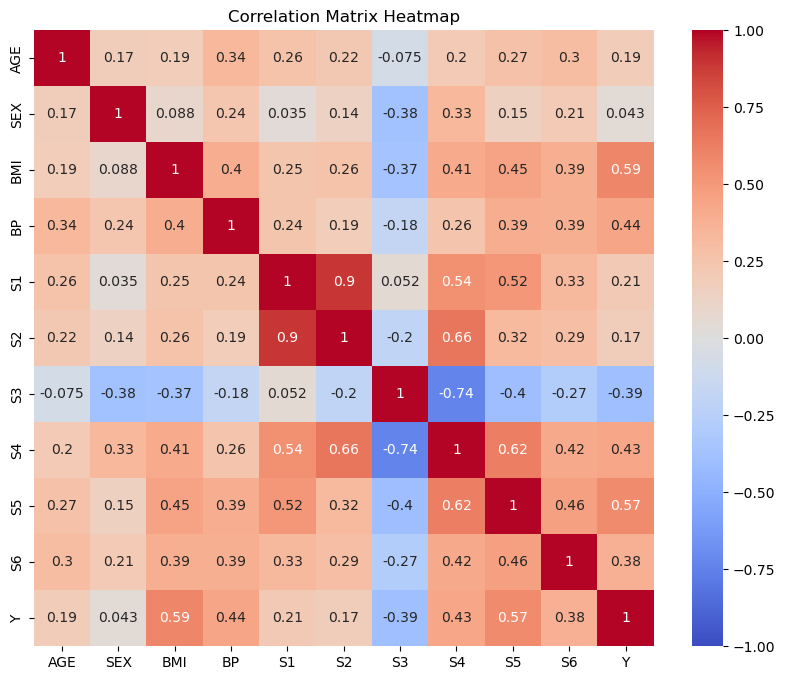

     Correlation Coefficient  Mean Linear Regression Coefficient
AGE                 0.187889                           -0.499411
SEX                 0.043062                          -11.430949
BMI                 0.586450                           24.756913
BP                  0.441482                           15.459594
S1                  0.212022                          -37.031758
S2                  0.174054                           22.222445
S3                 -0.394789                            4.440452
S4                  0.430453                            8.301175
S5                  0.565883                           35.506714
S6                  0.382483                            3.240609


In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Load the dataset
df = pd.read_csv('Diabetes_Data.csv', usecols=range(0, 11))

# Calculate correlation matrix
corrs = df.corr()

# Features and target
X = df.drop(['Y'], axis=1)
Y = df['Y']

# Normalize the features
nX = (X - X.mean()) / X.std()

# Step 1: Train-test split (80-20)
X_train, X_test, Y_train, Y_test = train_test_split(nX, Y, test_size=0.2, random_state=np.random.RandomState(31287))

# Step 2: Instantiate and fit the linear regression model
linear = LinearRegression()
linear.fit(X_train, Y_train)

# Step 3: Cross-validation with RepeatedKFold to obtain coefficients
scores = cross_validate(
    linear, nX, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)

# Model coefficients from cross-validation
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']], columns=nX.columns)

# Calculate the mean of the regression coefficients
mean_coefs = coefs.mean()

# Step 4: Extract the correlation coefficients with the target 'Y'
corr_with_target = corrs['Y'].drop('Y')

# Step 5: Combine correlation coefficients and mean regression coefficients into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Correlation Coefficient': corr_with_target,
    'Mean Linear Regression Coefficient': mean_coefs
})

# Step 6: Plot the comparison between correlation coefficients and regression coefficients
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Correlation Coefficients and Mean Linear Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Additionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrs, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Print the comparison DataFrame to see the actual values
print(comparison_df)


The model coefficients for the linear regression are largely consistent with the correlation scores. Features with higher correlation to the target Y (both positive and negative) have higher regression coefficients, indicating that they contribute similarly in the fitted model as they do in the raw correlations. This suggests the relationships identified in the correlation matrix hold up when accounting for other variables in the regression.

### Exercise 2 (coeeficient variability in a simpler model)

Try fitting a linear regression model to a subset of the features. To do this, select 3-4 columns from the normalised dataframe `nX` to use when constructing the train-test split, then fit the model parameters to this new training data as before. Describe how you selected your subset of features. Did the model coefficients for your chosen features turn out to be similar or different to those in the full model given in pre-studio notebook? (Comment on change in variability of the coefficients. If there is a difference, explain why.)

In [17]:
#Settings: 80-20 split, random state 31287.

#Aim is to show variability of corresponding coefficients 
#(train-test-split + cross validation + appropriate plot + compare to pre-studio)

# No regularisation yet.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('Diabetes_Data.csv', usecols=range(0, 11))

# Features and target
X = df.drop(['Y'], axis=1)
Y = df['Y']

# Normalize the features
nX = (X - X.mean()) / X.std()

# Step 1: Select 3-4 features based on their correlation with the target variable 'Y'
corrs = df.corr()['Y'].drop('Y').abs().sort_values(ascending=False)
selected_features = corrs.index[:4]  # Select the top 4 features with the highest absolute correlation

print(f"Selected Features: {selected_features}")

# Step 2: Subset the features from the normalized dataframe
X_selected = nX[selected_features]

# Step 3: Train-test split on the selected subset of features
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=np.random.RandomState(31287))

# Step 4: Instantiate and fit the linear regression model
linear = LinearRegression()
linear.fit(X_train, Y_train)

# Step 5: Cross-validation with RepeatedKFold to obtain coefficients for the subset model
scores = cross_validate(
    linear, X_selected, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)

# Extract coefficients from cross-validation runs
coefs_subset = pd.DataFrame([est.coef_ for est in scores['estimator']], columns=X_selected.columns)

# Step 6: Calculate the mean and standard deviation of the regression coefficients for the subset model
mean_coefs_subset = coefs_subset.mean()
std_coefs_subset = coefs_subset.std()

# Print the mean and standard deviation of the coefficients for the subset model
print("Mean Coefficients for the Subset Model:")
print(mean_coefs_subset)
print("\nStandard Deviation of Coefficients for the Subset Model:")
print(std_coefs_subset)





Selected Features: Index(['BMI', 'S5', 'BP', 'S4'], dtype='object')
Mean Coefficients for the Subset Model:
BMI    28.079310
S5     23.936843
BP     12.603558
S4      3.544498
dtype: float64

Standard Deviation of Coefficients for the Subset Model:
BMI    1.351264
S5     1.948215
BP     1.426251
S4     2.364115
dtype: float64


Feature Selection Process:
Correlation with Target (Y):

We calculated the correlation matrix for the dataset, which shows how strongly each feature is linearly correlated with the target variable Y.
The absolute values of the correlations were taken to ensure that both positive and negative correlations were considered, as the strength of the relationship is more important than the direction (sign) for feature selection.
Sorting by Absolute Correlation:

The features were sorted by their absolute correlation with the target variable Y in descending order. This allowed us to focus on the features that have the strongest relationship with the target, regardless of whether that relationship was positive or negative.

***
In W8 pre-studio notebook we found the optimal tuning parameters ($\alpha$) for both Ridge and Lasso regularisation via numerical experimentation. In practice however, the process of tuning and fitting a linear regression with Ridge or Lasso regularisation is automated through the functions `RidgeCV` and `LassoCV` respectively. When we call the .fit method for `RidgeCV`, cross-valiadation is implemented by performing Ridge linear regression over a variety of tuning parameters in order to determine the optimal tuning parameter $\alpha$. Once the optimal tuning parameter is found, the model can then be fit. In fact, we can extract the optimal tuning parameter $\alpha$ by calling .alpha_. A similar process is utilised for `LassoCV`.

N.B. Both Ridge and Lasso regularisation require the feature set to be normalised. 

### Exercise 3 (RidgeCV)

Here you will use `RidgeCV` from scikit-learn to perform Ridge linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the RidgeCV model by calling RidgeCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `RidgeCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [18]:
from sklearn.linear_model import RidgeCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size=0.2,
    random_state=1235
) 

ridgecv = RidgeCV(alfas, store_cv_values=True)

# Now you will need to fit the model on the train data using the instantiated model ridgecv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

# Load the dataset and prepare normalized features and target
df = pd.read_csv('Diabetes_Data.csv', usecols=range(0, 11))
X = df.drop('Y', axis=1)
Y = df['Y']
nX = (X - X.mean()) / X.std()

# Step 1: Define the alphas (tuning parameters)
alfas = np.logspace(-2, 2, num=21)

# Step 2: Split the data into training and testing sets (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(nX, Y, test_size=0.2, random_state=1235)

# Step 3: Instantiate the RidgeCV model and fit it to the training data
ridgecv = RidgeCV(alphas=alfas, store_cv_values=True)
ridgecv.fit(X_train, Y_train)

# Step 4: Calculate the R² scores for both the training and testing sets
train_r2 = ridgecv.score(X_train, Y_train)
test_r2 = ridgecv.score(X_test, Y_test)

# Step 5: Find the optimal alpha
optimal_alpha = ridgecv.alpha_

# Output the results
print(f"Optimal alpha: {optimal_alpha}")
print(f"Training R² score: {train_r2}")
print(f"Testing R² score: {test_r2}")


Optimal alpha: 1.584893192461114
Training R² score: 0.5310915949702011
Testing R² score: 0.4520816347588278


My optimal alpha is different in this notebook due a few factors:
Different random state or data splits.
The alpha range or distribution used might be different.
RidgeCV employs cross-validation, so even slight changes in the cross-validation procedure or data distribution could lead to different results.

### Exercise 4 (LassoCV)

Here you will use `LassoCV` from scikit-learn to perform Lasso linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the LassoCV model by calling LassoCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `LassoCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [20]:
from sklearn.linear_model import LassoCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size = 0.2,
    random_state = 1235
) 

lassocv = LassoCV(alphas = alfas)

# Now you will need to fit the model on the train data using the instantiated model lassocv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

# Load the dataset and prepare normalized features and target
df = pd.read_csv('Diabetes_Data.csv', usecols=range(0, 11))
X = df.drop('Y', axis=1)
Y = df['Y']
nX = (X - X.mean()) / X.std()

# Step 1: Define the alphas (tuning parameters)
alfas = np.logspace(-2, 2, num=21)

# Step 2: Split the data into training and testing sets (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(nX, Y, test_size=0.2, random_state=1235)

# Step 3: Instantiate the LassoCV model
lassocv = LassoCV(alphas=alfas)

# Step 4: Fit the LassoCV model on the training data
lassocv.fit(X_train, Y_train)

# Step 5: Calculate the R² scores for both the training and testing sets
train_r2 = lassocv.score(X_train, Y_train)
test_r2 = lassocv.score(X_test, Y_test)

# Step 6: Find the optimal alpha
optimal_alpha = lassocv.alpha_

# Output the results
print(f"Optimal alpha: {optimal_alpha}")
print(f"Training R² score: {train_r2}")
print(f"Testing R² score: {test_r2}")


Optimal alpha: 0.01
Training R² score: 0.531601250936596
Testing R² score: 0.4507374241968003


My optimal tuning parameter alpha is different due to several factors:
Different random state or data splitting.
Different alpha ranges or distributions used for tuning.
Lasso regression's tendency to perform feature selection by shrinking coefficients to zero, which may lead to different results in terms of optimal alpha when compared to Ridge regression or other methods.

## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5* (coefficient variability vs multicolinearity)

Similarly to the beginning of this notebook, repeat the k-fold cross-validation test for coefficient variability, but first remove the feature 'S2' from the dataset. Observe the impact on the coefficients for the other features. In particular, look at the coefficient for 'S1'. You should see that the range of values produced for the S1 coefficient is much narrower. Can you think of a reason why this is the case (consider the mathematical form of the model)?